# **Project- Heart Disease Prediction Model**

In [1]:
#Importing relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.shape

(1025, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.info() #checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Importing Libraries for model building

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score, roc_auc_score

In [10]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [12]:
scaler = StandardScaler()

In [13]:
x_train_new = scaler.fit_transform(x_train)
x_test_new = scaler.transform(x_test)

# 2. EDA

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualizations

Text(0, 0.5, 'Count')

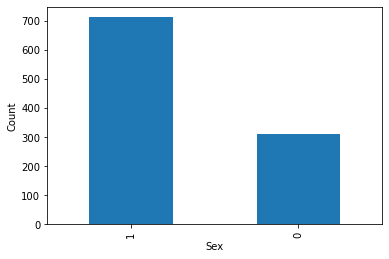

In [16]:
data['sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')

# Male-1, Female-0

Text(0, 0.5, 'count')

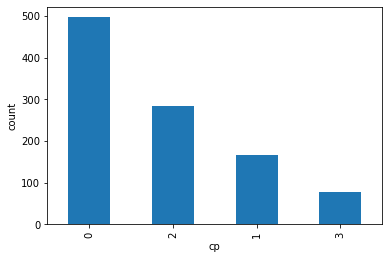

In [17]:
data['cp'].value_counts().plot.bar()
plt.xlabel('cp')
plt.ylabel('count')

Text(0, 0.5, 'count')

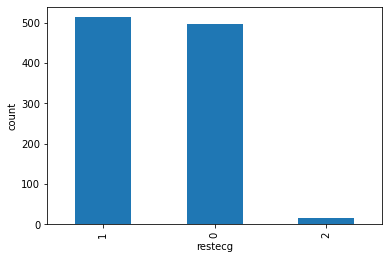

In [18]:
data['restecg'].value_counts().plot.bar()
plt.xlabel('restecg')
plt.ylabel('count')

<AxesSubplot:xlabel='cp', ylabel='count'>

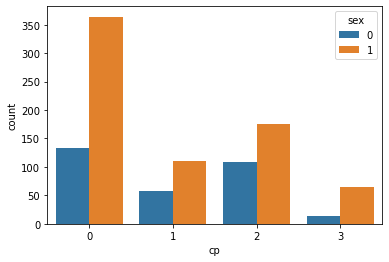

In [19]:
sns.countplot(x=data['cp'], hue=data['sex'])

Text(0, 0.5, 'Count')

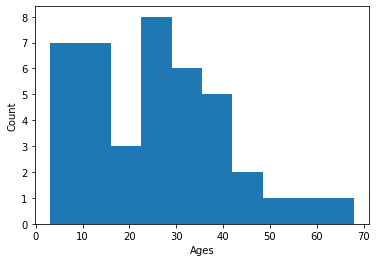

In [20]:
data['age'].value_counts().plot.hist()
plt.xlabel('Ages')
plt.ylabel('Count')

<AxesSubplot:xlabel='sex', ylabel='Density'>

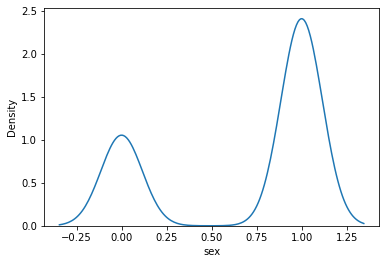

In [21]:
sns.kdeplot(data['sex'])

<AxesSubplot:xlabel='age', ylabel='Count'>

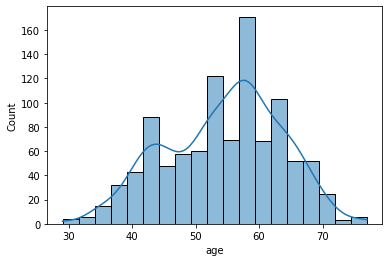

In [22]:
sns.histplot(data['age'],kde='true')

<AxesSubplot:>

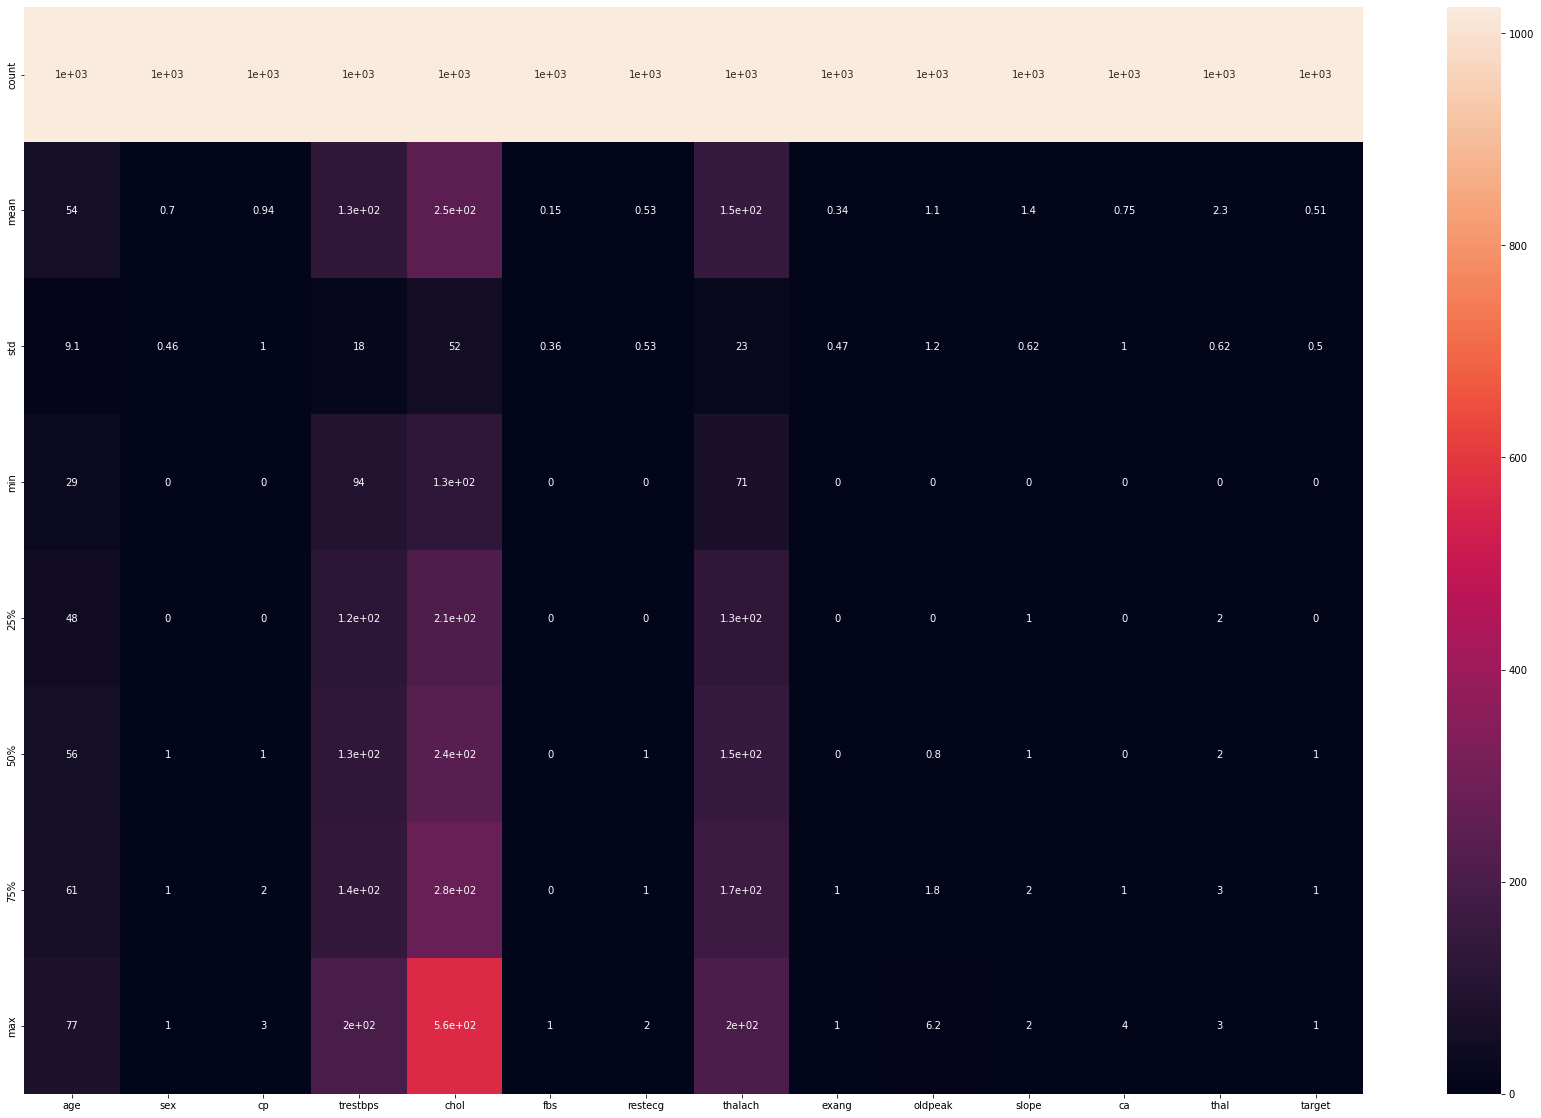

In [23]:
plt.figure(figsize=(30,20))
sns.heatmap(data.describe(),annot=True)

# 3. Model Implementation

#### KNN Classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_train_predict_knn = knn.predict(x_train)
y_test_predict_knn = knn.predict(x_test)

#### Naive Bayes Classifier (Using Gaussian Naive Bayes)

In [25]:
nbc = GaussianNB()
nbc.fit(x_train,y_train)
y_train_predict_nbc = nbc.predict(x_train)
y_test_predict_nbc = nbc.predict(x_test)

#### Decision Tree Classifier

In [26]:
dtc = DecisionTreeClassifier(random_state=40, max_depth=6)
dtc.fit(x_train_new, y_train)
y_train_predict_dtc = dtc.predict(x_train)
y_test_predict_dtc = dtc.predict(x_test_new)

# 4. Model Evaluation

### • For KNN Classifier

In [27]:
print("KNN Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :",accuracy_score(y_train,y_train_predict_knn))
print("Precision       :",precision_score(y_train,y_train_predict_knn))
print("Recall          :",recall_score(y_train,y_train_predict_knn))
print("f1 Score        :",f1_score(y_train,y_train_predict_knn))
print("ROC AUC Score   :",roc_auc_score(y_train,y_train_predict_knn))
print("Confusion Matrix:\n",confusion_matrix(y_train,y_train_predict_knn))
print("\nClassification Matrix :\n\n",classification_report(y_train,y_train_predict_knn))

print("\n-----------------Testing Performance:-----------------")
print("Accuracy        :",accuracy_score(y_test,y_test_predict_knn))
print("Precision       :",precision_score(y_test,y_test_predict_knn))
print("Recall          :",recall_score(y_test,y_test_predict_knn))
print("f1 Score        :",f1_score(y_test,y_test_predict_knn))
print("ROC AUC Score   :",roc_auc_score(y_test,y_test_predict_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_knn))
print("\nClassification Matrix :\n\n",classification_report(y_test,y_test_predict_knn))

KNN Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.9195121951219513
Precision       : 0.9302884615384616
Recall          : 0.9127358490566038
f1 Score        : 0.9214285714285714
ROC AUC Score   : 0.9197517629121402
Confusion Matrix:
 [[367  29]
 [ 37 387]]

Classification Matrix :

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       396
           1       0.93      0.91      0.92       424

    accuracy                           0.92       820
   macro avg       0.92      0.92      0.92       820
weighted avg       0.92      0.92      0.92       820


-----------------Testing Performance:-----------------
Accuracy        : 0.7463414634146341
Precision       : 0.7314814814814815
Recall          : 0.7745098039215687
f1 Score        : 0.7523809523809524
ROC AUC Score   : 0.7464782029316581
Confusion Matrix:
 [[74 29]
 [23 79]]

Classification Matrix :

               precisi

### • For Naive Bayes Classifier

In [28]:
print("Gaussian Naive Bayes Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :",accuracy_score(y_train,y_train_predict_nbc))
print("Precision       :",precision_score(y_train,y_train_predict_nbc))
print("Recall          :",recall_score(y_train,y_train_predict_nbc))
print("f1 Score        :",f1_score(y_train,y_train_predict_nbc))
print("ROC AUC Score   :",roc_auc_score(y_train,y_train_predict_nbc))
print("Confusion Matrix:\n",confusion_matrix(y_train,y_train_predict_nbc))
print("\nClassification Matrix :\n\n",classification_report(y_train,y_train_predict_nbc))

print("-----------------Testing Performance:-----------------")
print("Accuracy        :",accuracy_score(y_test,y_test_predict_nbc))
print("Precision       :",precision_score(y_test,y_test_predict_nbc))
print("Recall          :",recall_score(y_test,y_test_predict_nbc))
print("f1 Score        :",f1_score(y_test,y_test_predict_nbc))
print("ROC AUC Score   :",roc_auc_score(y_test,y_test_predict_nbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_nbc))
print("\nClassification Matrix :\n\n",classification_report(y_test,y_test_predict_nbc))

Gaussian Naive Bayes Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.8329268292682926
Precision       : 0.8153846153846154
Recall          : 0.875
f1 Score        : 0.8441410693970421
ROC AUC Score   : 0.8314393939393939
Confusion Matrix:
 [[312  84]
 [ 53 371]]

Classification Matrix :

               precision    recall  f1-score   support

           0       0.85      0.79      0.82       396
           1       0.82      0.88      0.84       424

    accuracy                           0.83       820
   macro avg       0.84      0.83      0.83       820
weighted avg       0.83      0.83      0.83       820

-----------------Testing Performance:-----------------
Accuracy        : 0.8195121951219512
Precision       : 0.7927927927927928
Recall          : 0.8627450980392157
f1 Score        : 0.8262910798122066
ROC AUC Score   : 0.8197220635827146
Confusion Matrix:
 [[80 23]
 [14 88]]

Classification Matrix :

               prec

### • For Decison Tree Classifier

In [29]:
print("Decision Tree Classifier Model Performance: \n")

print("------------------Training Performance:----------------")
print("Accuracy        :",accuracy_score(y_train,y_train_predict_dtc))
print("Precision       :",precision_score(y_train,y_train_predict_dtc))
print("Recall          :",recall_score(y_train,y_train_predict_dtc))
print("f1 Score        :",f1_score(y_train,y_train_predict_dtc))
print("ROC AUC Score   :",roc_auc_score(y_train,y_train_predict_dtc))
print("Confusion Matrix:\n",confusion_matrix(y_train,y_train_predict_dtc))
print("\nClassification Matrix :\n\n",classification_report(y_train,y_train_predict_dtc))

print("-----------------Testing Performance:-----------------")
print("Accuracy        :",accuracy_score(y_test,y_test_predict_dtc))
print("Precision       :",precision_score(y_test,y_test_predict_dtc))
print("Recall          :",recall_score(y_test,y_test_predict_dtc))
print("f1 Score        :",f1_score(y_test,y_test_predict_dtc))
print("ROC AUC Score   :",roc_auc_score(y_test,y_test_predict_dtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_dtc))
print("\nClassification Matrix :\n",classification_report(y_test,y_test_predict_dtc))

Decision Tree Classifier Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.48048780487804876
Precision       : 0.4444444444444444
Recall          : 0.018867924528301886
f1 Score        : 0.03619909502262443
ROC AUC Score   : 0.4968076996378883
Confusion Matrix:
 [[386  10]
 [416   8]]

Classification Matrix :

               precision    recall  f1-score   support

           0       0.48      0.97      0.64       396
           1       0.44      0.02      0.04       424

    accuracy                           0.48       820
   macro avg       0.46      0.50      0.34       820
weighted avg       0.46      0.48      0.33       820

-----------------Testing Performance:-----------------
Accuracy        : 0.9219512195121952
Precision       : 0.9134615384615384
Recall          : 0.9313725490196079
f1 Score        : 0.9223300970873786
ROC AUC Score   : 0.9219969541214545
Confusion Matrix:
 [[94  9]
 [ 7 95]]

Classification Matrix :
          

In [30]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['KNN Classifier','Naive Bayes Classifier','Decision Tree Classifier'], 'Accuracy':[accuracy_score(y_train_predict_knn,y_train)*100, accuracy_score(y_train_predict_nbc,y_train)*100, accuracy_score(y_train_predict_dtc,y_train)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,KNN Classifier,91.951220
1,Naive Bayes Classifier,83.292683
2,Decision Tree Classifier,48.048780


In [31]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['KNN Classifier','Naive Bayes Classifier','Decision Tree Classifier'], 'Accuracy':[accuracy_score(y_test_predict_knn,y_test)*100, accuracy_score(y_test_predict_nbc,y_test)*100, accuracy_score(y_test_predict_dtc,y_test)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,KNN Classifier,74.634146
1,Naive Bayes Classifier,81.951220
2,Decision Tree Classifier,92.195122


# 5. Cross Validation and Overfitting Check

In [32]:
from sklearn.model_selection import cross_val_score, KFold
cvs = cross_val_score
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

### For KNN Classifier

In [33]:
# Check the training and validation scores
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)
if train_score > test_score:
    print('KNN Classifier Model is Overfitted!')
    print('Training score:', train_score)
    print('Testing score:', test_score)
else:
    print('KNN Classifier Model is not Overfitted.')
    print('Training score:', train_score)
    print('Testing score:', test_score)

KNN Classifier Model is Overfitted!
Training score: 0.9195121951219513
Testing score: 0.7463414634146341


In [34]:
score_knn = cvs(knn, x_test, y_test, cv=10)
score_knn

array([0.61904762, 0.66666667, 0.71428571, 0.85714286, 0.85714286,
       0.6       , 0.8       , 0.75      , 0.85      , 0.85      ])

In [35]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Training Accuracy Scores for Each Fold:
Fold 1: 0.972885032537961
Fold 2: 0.9446854663774403
Fold 3: 0.9501084598698482
Fold 4: 0.9577006507592191
Fold 5: 0.9631236442516269
Fold 6: 0.9479956663055255
Fold 7: 0.9490790899241603
Fold 8: 0.9501625135427952
Fold 9: 0.9555796316359697
Fold 10: 0.9534127843986999

Testing Accuracy Scores for Each Fold:
Fold 1: 0.7766990291262136
Fold 2: 0.7087378640776699
Fold 3: 0.7766990291262136
Fold 4: 0.7961165048543689
Fold 5: 0.8058252427184466
Fold 6: 0.7549019607843137
Fold 7: 0.696078431372549
Fold 8: 0.7450980392156863
Fold 9: 0.7254901960784313
Fold 10: 0.6862745098039216

Average Accuracy Training Score: 0.9544732939603247

Average Accuracy Testing Score: 0.7471920807157815


### For Naive Bayes Classifier

In [36]:
# Check the training and validation scores
train_score = nbc.score(x_train, y_train)
test_score = nbc.score(x_test, y_test)
if train_score > test_score:
    print('Naive Bayes Classifier Model is Overfitted!')
    print('Training score:', train_score)
    print('Testing score:', test_score)
else:
    print('Naive Bayes Classifier Model is not Overfitted.')
    print('Training score:', train_score)
    print('Testing score:', test_score)

Naive Bayes Classifier Model is Overfitted!
Training score: 0.8342361863488624
Testing score: 0.7941176470588235


In [37]:
score_nbc = cvs(nbc, x_test, y_test, cv=10)
score_nbc

array([0.81818182, 0.81818182, 0.7       , 0.9       , 0.8       ,
       0.9       , 0.8       , 0.7       , 0.7       , 0.4       ])

In [38]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    nbc.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = nbc.predict(x_test)
    y_pred_train = nbc.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Training Accuracy Scores for Each Fold:
Fold 1: 0.834056399132321
Fold 2: 0.8286334056399133
Fold 3: 0.824295010845987
Fold 4: 0.8275488069414316
Fold 5: 0.8308026030368764
Fold 6: 0.8342361863488624
Fold 7: 0.8277356446370531
Fold 8: 0.8212351029252438
Fold 9: 0.8244853737811484
Fold 10: 0.8331527627302275

Testing Accuracy Scores for Each Fold:
Fold 1: 0.7961165048543689
Fold 2: 0.7961165048543689
Fold 3: 0.8543689320388349
Fold 4: 0.8543689320388349
Fold 5: 0.7961165048543689
Fold 6: 0.7941176470588235
Fold 7: 0.8529411764705882
Fold 8: 0.8823529411764706
Fold 9: 0.8529411764705882
Fold 10: 0.7745098039215687

Average Accuracy Training Score: 0.8286181296019064

Average Accuracy Testing Score: 0.8253950123738815


### For Decision Tree Classifier

In [39]:
# Check the training and validation scores
train_score = dtc.score(x_train, y_train)
test_score = dtc.score(x_test, y_test)
if train_score > test_score:
    print('Decision Tree Classifier Model is Overfitted!')
    print('Training score:', train_score)
    print('Testing score:', test_score)
else:
    print('Decision Tree Classifier Model is not Overfitted.')
    print('Training score:', train_score)
    print('Testing score:', test_score)

Decision Tree Classifier Model is Overfitted!
Training score: 0.48429035752979416
Testing score: 0.4803921568627451


In [40]:
score_dtc = cvs(dtc, x_test, y_test, cv=10)
score_dtc

array([0.81818182, 0.63636364, 1.        , 0.7       , 0.9       ,
       0.9       , 1.        , 0.7       , 0.9       , 0.6       ])

In [41]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    dtc.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = dtc.predict(x_test)
    y_pred_train = dtc.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Training Accuracy Scores for Each Fold:
Fold 1: 0.96529284164859
Fold 2: 0.9587852494577006
Fold 3: 0.9685466377440347
Fold 4: 0.9674620390455532
Fold 5: 0.9642082429501084
Fold 6: 0.9631635969664138
Fold 7: 0.9544962080173348
Fold 8: 0.9609967497291441
Fold 9: 0.962080173347779
Fold 10: 0.9729144095341279

Testing Accuracy Scores for Each Fold:
Fold 1: 0.9223300970873787
Fold 2: 0.8932038834951457
Fold 3: 0.941747572815534
Fold 4: 0.9611650485436893
Fold 5: 0.9611650485436893
Fold 6: 0.9705882352941176
Fold 7: 0.9705882352941176
Fold 8: 0.9607843137254902
Fold 9: 0.9509803921568627
Fold 10: 0.9117647058823529

Average Accuracy Training Score: 0.9637946148440788

Average Accuracy Testing Score: 0.944431753283838
